## Phase 4 – Model Training And Evaluation

In [1]:
# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)
import joblib

In [2]:
# loading data 
df = pd.read_csv("../data/heart_disease_cleaned.csv")
df.head()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,st_slope,target
0,-1.466728,0.555995,-1.318351,0.427328,0.775674,-0.520929,-0.802672,1.265039,-0.795219,-0.849792,-1.023217,0.0
1,-0.504600,-1.798576,-0.248932,1.516587,-0.299512,-0.520929,-0.802672,0.637758,-0.795219,0.071119,0.615583,1.0
2,-1.787437,0.555995,-1.318351,-0.117301,0.716489,-0.520929,0.346762,-1.636136,-0.795219,-0.849792,-1.023217,0.0
3,-0.611503,-1.798576,0.820487,0.318402,0.035867,-0.520929,-0.802672,-1.244085,1.257515,0.531575,0.615583,1.0
4,0.029915,0.555995,-0.248932,0.971958,-0.151550,-0.520929,-0.802672,-0.695214,-0.795219,-0.849792,-1.023217,0.0


In [3]:
# Split data for training and testing
X = df.drop("target", axis=1)
y = df["target"]

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (1190, 11)
Target shape: (1190,)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (952, 11)
Test shape: (238, 11)


In [5]:
# Train models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

In [9]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f" {name} trained successfully")

 Logistic Regression trained successfully
 Random Forest trained successfully
 SVM trained successfully
 KNN trained successfully


In [12]:
# Evaluate models
results = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        roc = roc_auc_score(y_test, y_prob)
    else:
        y_prob = None
        roc = np.nan
    roc = roc_auc_score(y_test, y_prob)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append([name, acc, prec, rec, f1, roc])

results_df = pd.DataFrame(
    results,
    columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]
)

results_df

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.840336,0.843750,0.857143,0.850394,0.904124
1,Random Forest,0.928571,0.929134,0.936508,0.932806,0.971159
2,SVM,0.882353,0.865672,0.920635,0.892308,0.935197
3,KNN,0.836134,0.827068,0.873016,0.849421,0.918722


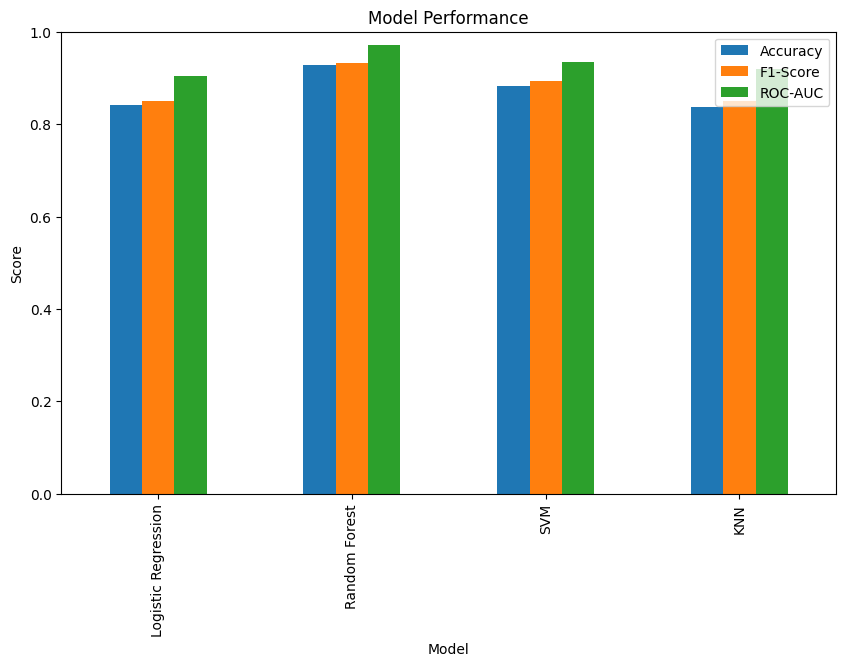

In [13]:
# Compare models
results_df.set_index("Model")[["Accuracy", "F1-Score", "ROC-AUC"]].plot.bar(figsize=(10,6))
plt.title("Model Performance")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.show()

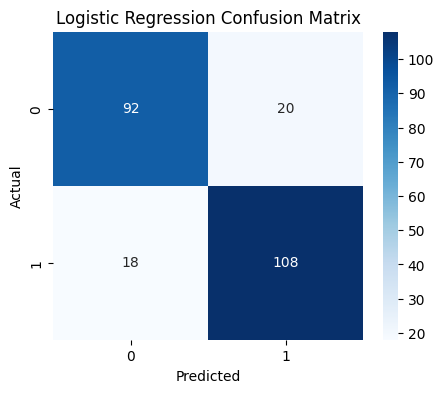

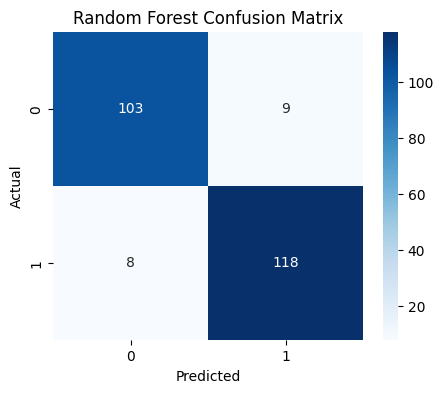

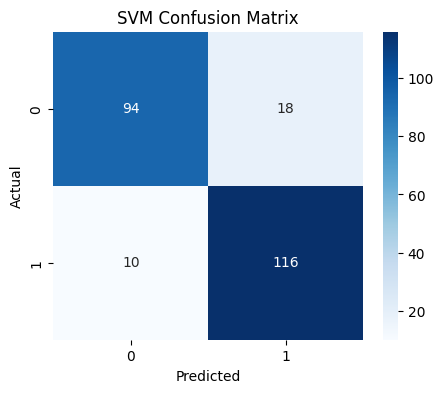

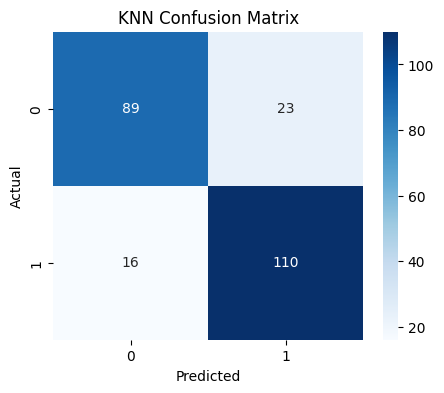

In [14]:
# Plotting confusion matrices for all models
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [16]:
import os
import joblib
os.makedirs("../models", exist_ok=True)
for name, model in models.items():
    file_name = name.lower().replace(" ", "_") + "_model.pkl"
    joblib.dump(model, f"../models/{file_name}")
print("All models saved successfully")

All models saved successfully


## Conclusion
1. In this model training, multiple supervised machine learning models were trained on the cleaned dataset to classify heart disease risk. 
2. Random Forest performed better than other models across most evaluation metrics, while Logistic Regression, SVM, and KNN showed reasonable performance. 
3. These results were used as baseline models for further improvement through hyperparameter tuning.